#### Naive Bayes Classifier for Classificating Spam Emails

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
# Settings
train_data_size = 5000

# Load Data
email_data = pd.read_csv('./dataset/emails.csv', header=0)

# Remove the First 1000 Columns of High Frequency Words
email_data.drop(email_data.columns[0], axis=1, inplace=True)
for col in email_data.columns:
    email_data.loc[email_data[col] > 0, col] = 1

# Training Set
train_X = email_data.iloc[0:train_data_size, 0:-1].values
train_Y = email_data.iloc[0:train_data_size:, -1].values

# Test Set
test_X = email_data.iloc[train_data_size:, 0:-1].values
test_Y = email_data.iloc[train_data_size:, -1].values


In [84]:
# Swap 0s with 1s and 1s with 0s in Output Set for Summation of Indicator Functions
swapped_train_Y = np.where(train_Y==0, 1, 0) 

# The Parameters of The NBC Model
train_X_y0 = train_X[train_Y == 0] # return all rows except its last column when y=0
train_X_y1 = train_X[train_Y == 1] # return all rows except its last column when y=1
X_y0_prob = np.sum(train_X_y0, axis=0) / np.sum(swapped_train_Y) #! φx1|y0 = ΣI(x(i)=1 & y(i)=0) / ΣI(y(i)=0)
X_y1_prob = np.sum(train_X_y1, axis=0) / np.sum(train_Y) #! φx1|y1 = ΣI(x(i)=1 & y(i)=1) / ΣI(y(i)=1)
y1_prob = 1 / train_data_size * np.sum(train_Y) #! φy1 = 1/n * ΣI(y(i)=1)
y0_prob = 1- y1_prob #! φy0 = 1 - φy1

In [85]:
# Calculate the Probabilities of Test Set Using NBC.
p_y0_given_X = y0_prob * np.prod(np.power(X_y0_prob, test_X) * np.power(1 - X_y0_prob, 1 - test_X), axis=1)
#! p(y=0|x) = p(y=0) * Π[p(x=1|y=0)^(x) * p(x=0|y=0)^(1-x)]
p_y1_given_X = y1_prob * np.prod(np.power(X_y1_prob, test_X) * np.power(1 - X_y1_prob, 1 - test_X), axis=1)
#! p(y=1|x) = p(y=1) * Π[p(x=1|y=1)^(x) * p(x=0|y=1)^(1-x)]

# The Predicted Class Is the One where p_y1_given_X > p_y0_given_X.
test_Y_hat = np.where(p_y1_given_X > p_y0_given_X, 1, 0)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       118
           1       0.97      0.63      0.76        54

    accuracy                           0.88       172
   macro avg       0.91      0.81      0.84       172
weighted avg       0.89      0.88      0.87       172



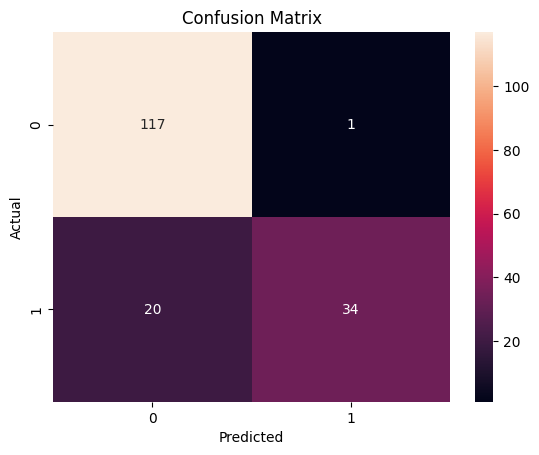

In [86]:
# Print Classification Report
print(classification_report(test_Y, test_Y_hat, zero_division=0))

# Create Confusion Matrix
cm = confusion_matrix(test_Y, test_Y_hat)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()